# Notebook Imports

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import opendatasets as od
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import os

%matplotlib inline

## Fetching Data

In [2]:
data_url = "https://www.kaggle.com/datasets/sandeepkumar69/website-traffic-data/data"

In [3]:
od.download(data_url)

Skipping, found downloaded files in ".\website-traffic-data" (use force=True to force download)


In [4]:
data_dir = "./website-traffic-data"

In [5]:
os.listdir(data_dir)

['traffic.csv']

In [6]:
train_csv = data_dir + '/traffic.csv'

In [7]:
data = pd.read_csv(train_csv)

In [8]:
data.head()

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0


#### Basic information about data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    232 non-null    object 
 1   Visits  232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 30.1+ KB


In [10]:
data.describe()

,Visits
count,232.000000
mean,4081.435345
std,1018.730432
min,1554.000000
25%,3428.250000
50%,3988.000000
75%,4874.750000
max,6659.000000


Converting Date column into Datetime data type

In [11]:
data["Date"] = pd.to_datetime(data["Date"], 
                              infer_datetime_format=True)

In [12]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format='%d/%m/%Y')

In [13]:
data.head()

,Date,Visits
0,2020-01-01,1554.0
1,2020-01-02,2820.0
2,2020-01-03,2970.0
3,2020-01-04,2111.0
4,2020-01-05,2393.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    232 non-null    datetime64[ns]
 1   Visits  232 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.1 KB


Plotting daily traffic of the website

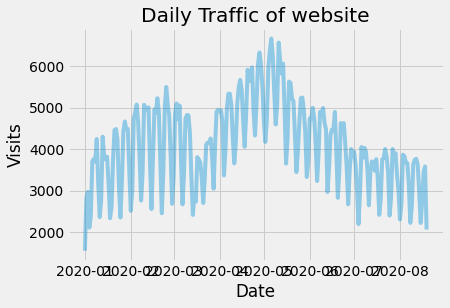

In [15]:
plt.style.use('fivethirtyeight')
plt.plot(data["Date"], data["Visits"], alpha = 0.4)
plt.title("Daily Traffic of website")
plt.xlabel('Date')
plt.ylabel('Visits')
plt.show()

In [16]:
data = data.dropna(axis=0)

Checking wether data is seasonal or not

<Figure size 432x288 with 0 Axes>

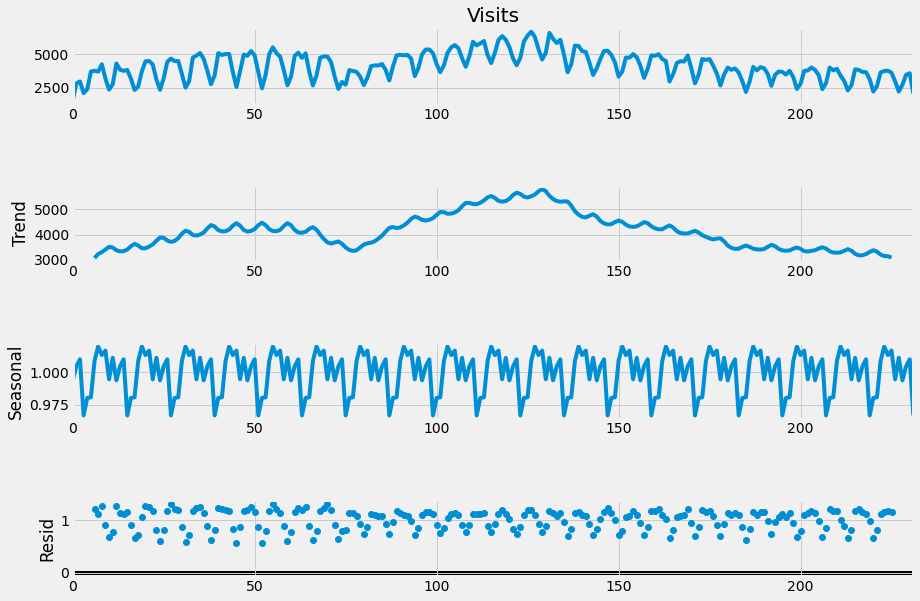

In [17]:
result = seasonal_decompose(data["Visits"],
                           model='multiplicative',
                           period=12)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

From the above plots, we can see that our data is seasonal

Seasonal ARIMA model is used to forecast the traffic on the website in this project.
So, we need to know the values of p, d and q.

As the data is not stationary, the value of d is 1. To find the values of p and q, use of autocorrelation and partial autocorrelation plots is done.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

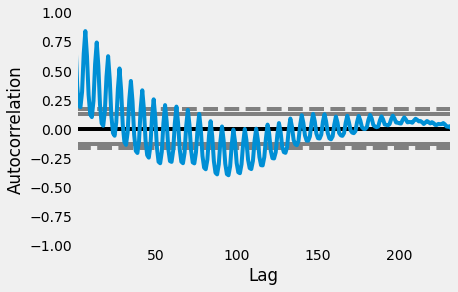

In [18]:
pd.plotting.autocorrelation_plot(data["Visits"])

C:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


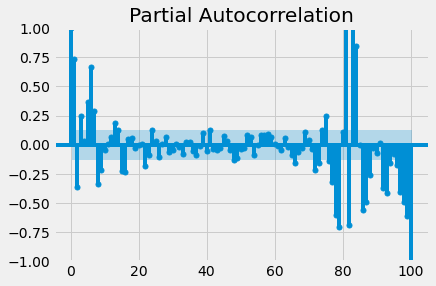

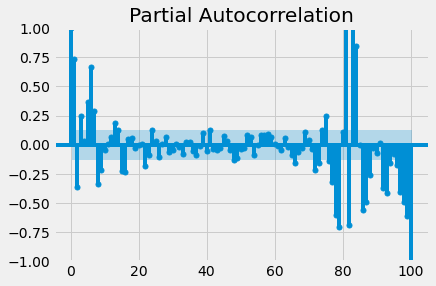

In [19]:
plot_pacf(data["Visits"], lags = 100)

### Training the SARIMA model

In [ ]:
p, d, q = 5, 1, 7
model=sm.tsa.statespace.SARIMAX(data['Visits'],
                     order=(p, d, q),
                     seasonal_order=(p, d, q, 12))

model=model.fit()
print(model.summary())

C:\Users\sande\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
predictions = model.predict(len(data), len(data)+30)
print(predictions)

In [ ]:
data["Visits"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10), alpha=0.4)
predictions.plot(legend=True, label="Predictions", alpha=0.6)